<a href="https://colab.research.google.com/github/neethu2602/DSA_Class_Activities-/blob/main/superviselearning_casestudy_NeethuMathew.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
# 1. Introduction
# =========================
# - Brief description of the problem: Predict which customers are likely to churn.
# - Dataset overview: number of rows, columns, target variable.
# - Objective: Build and evaluate ML models to predict churn.
#2. Exploratory Data Analysis (EDA)
# =========================
# - Load train and test datasets using pd.read_csv().
# - Use df.info() and df.describe() to understand data types and distributions.
# - Visualize missing values (sns.heatmap or df.isnull().sum()).
# - Plot churn distribution (sns.countplot).
# - Explore numeric features using histograms or boxplots (sns.histplot, sns.boxplot).
# - Explore categorical features using countplots (sns.countplot).
# - Correlation analysis for numeric features (sns.heatmap with df.corr()).
# - Identify outliers and anomalies.

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler,MinMaxScaler,LabelEncoder,OneHotEncoder
from sklearn.model_selection import train_test_split
import seaborn as sns

In [4]:
train = pd.read_csv("/content/Training_data.csv")
test = pd.read_csv("/content/Testing_data.csv")

In [5]:
train.shape

(5634, 21)

In [6]:
test.shape


(1409, 21)

In [7]:
train.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,9509-MPYOD,Female,0,No,No,35,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,One year,No,Mailed check,20.75,700.45,No
1,7746-AWNQW,Female,0,No,No,28,No,No phone service,DSL,No,...,Yes,Yes,No,No,Month-to-month,Yes,Mailed check,35.75,961.4,No
2,2208-UGTGR,Male,0,No,No,56,Yes,Yes,Fiber optic,No,...,No,No,Yes,Yes,Month-to-month,No,Electronic check,98.60,5581.05,No
3,4884-LEVMQ,Male,0,Yes,No,39,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,Yes,Bank transfer (automatic),20.45,790,No
4,6682-VCIXC,Female,0,Yes,Yes,43,No,No phone service,DSL,NaN,...,No,Yes,Yes,No,One year,Yes,Bank transfer (automatic),51.25,2151.6,No


In [8]:
test.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,6080-TCMYC,Male,0,Yes,Yes,40,Yes,Yes,Fiber optic,No,...,Yes,No,No,No,Month-to-month,Yes,Electronic check,81.20,3292.3,No
1,7285-KLOTR,Female,0,Yes,No,12,Yes,Yes,DSL,Yes,...,Yes,No,Yes,Yes,One year,No,Electronic check,78.85,876.75,No
2,7486-KSRVI,Male,0,No,No,43,Yes,Yes,Fiber optic,No,...,No,Yes,Yes,Yes,One year,Yes,Electronic check,100.00,4211.55,Yes
3,9924-JPRMC,Male,0,No,No,72,Yes,Yes,Fiber optic,Yes,...,Yes,Yes,Yes,Yes,Two year,Yes,Electronic check,118.20,8547.15,No
4,4439-YRNVD,Female,0,No,No,10,No,No phone service,DSL,No,...,No,Yes,No,No,Month-to-month,No,Electronic check,36.25,374,No


In [9]:
train.isnull().sum()

,0
customerID,0
gender,169
SeniorCitizen,0
Partner,0
Dependents,0
tenure,0
PhoneService,0
MultipleLines,0
InternetService,0
OnlineSecurity,169


In [10]:
test.isnull().sum()

,0
customerID,0
gender,0
SeniorCitizen,0
Partner,0
Dependents,0
tenure,0
PhoneService,0
MultipleLines,0
InternetService,0
OnlineSecurity,0


In [11]:
train.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,5634.000000,5634.000000,5240.000000
mean,0.159744,32.606851,65.102052
std,0.366401,24.614976,30.056443
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,36.800000
50%,0.000000,29.000000,70.650000
75%,0.000000,56.000000,90.050000
max,1.000000,72.000000,118.750000


In [12]:
test.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,1409.000000,1409.000000,1409.000000
mean,0.171753,31.428673,63.898013
std,0.377300,24.322161,30.282693
min,0.000000,0.000000,18.700000
25%,0.000000,8.000000,30.100000
50%,0.000000,27.000000,69.900000
75%,0.000000,54.000000,89.500000
max,1.000000,72.000000,118.600000


In [13]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5634 entries, 0 to 5633
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        5634 non-null   object 
 1   gender            5465 non-null   object 
 2   SeniorCitizen     5634 non-null   int64  
 3   Partner           5634 non-null   object 
 4   Dependents        5634 non-null   object 
 5   tenure            5634 non-null   int64  
 6   PhoneService      5634 non-null   object 
 7   MultipleLines     5634 non-null   object 
 8   InternetService   5634 non-null   object 
 9   OnlineSecurity    5465 non-null   object 
 10  OnlineBackup      5634 non-null   object 
 11  DeviceProtection  5634 non-null   object 
 12  TechSupport       5634 non-null   object 
 13  StreamingTV       5634 non-null   object 
 14  StreamingMovies   5634 non-null   object 
 15  Contract          5634 non-null   object 
 16  PaperlessBilling  5634 non-null   object 


In [14]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1409 entries, 0 to 1408
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        1409 non-null   object 
 1   gender            1409 non-null   object 
 2   SeniorCitizen     1409 non-null   int64  
 3   Partner           1409 non-null   object 
 4   Dependents        1409 non-null   object 
 5   tenure            1409 non-null   int64  
 6   PhoneService      1409 non-null   object 
 7   MultipleLines     1409 non-null   object 
 8   InternetService   1409 non-null   object 
 9   OnlineSecurity    1409 non-null   object 
 10  OnlineBackup      1409 non-null   object 
 11  DeviceProtection  1409 non-null   object 
 12  TechSupport       1409 non-null   object 
 13  StreamingTV       1409 non-null   object 
 14  StreamingMovies   1409 non-null   object 
 15  Contract          1409 non-null   object 
 16  PaperlessBilling  1409 non-null   object 


In [15]:
train.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [16]:
test.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [17]:
features_df = train.drop(columns=["Churn"])

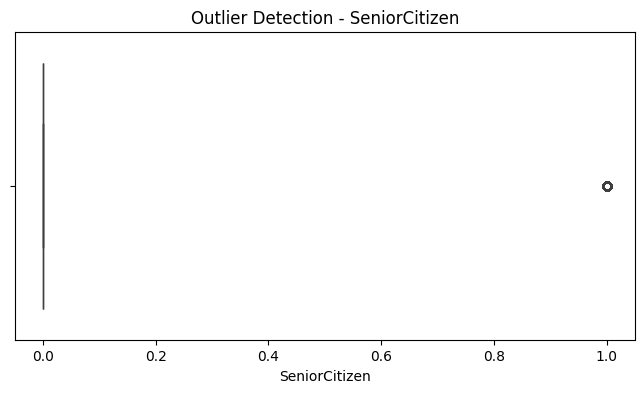

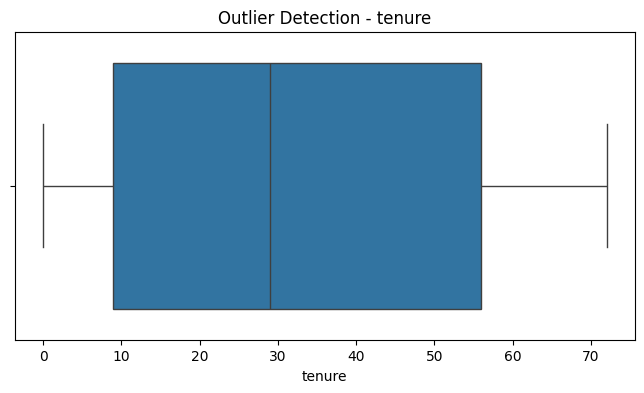

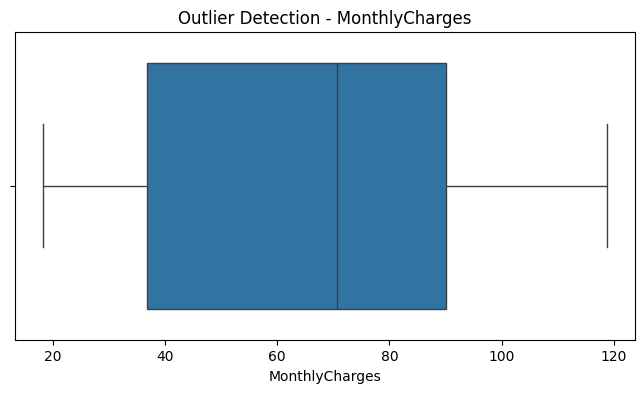

In [18]:
numeric_cols = features_df.select_dtypes(include=np.number).columns

for col in numeric_cols:
    plt.figure(figsize=(8, 4))
    sns.boxplot(x=features_df[col])
    plt.title(f"Outlier Detection - {col}")
    plt.show()

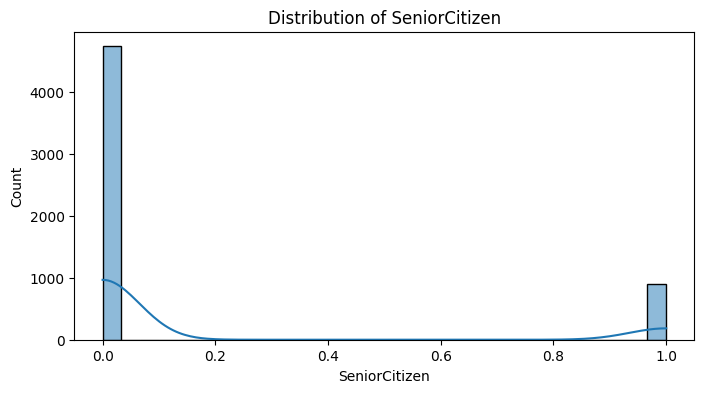

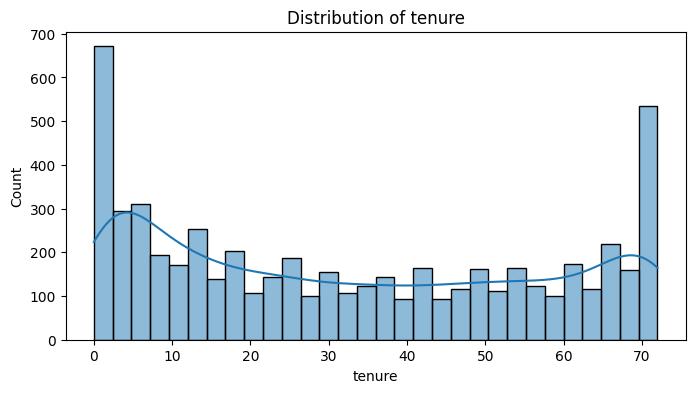

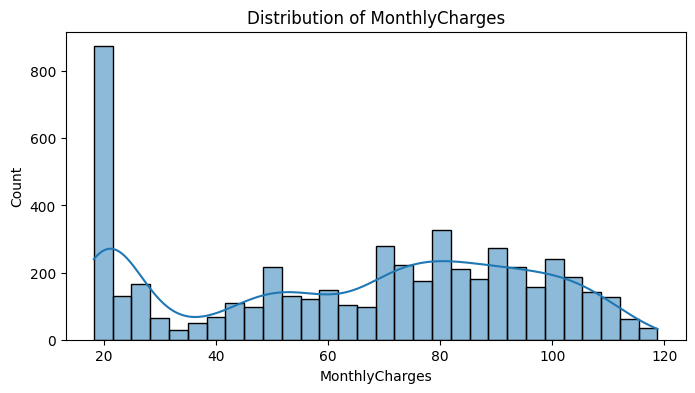

In [19]:
for col in numeric_cols:
    plt.figure(figsize=(8, 4))
    sns.histplot(features_df[col], kde=True, bins=30)
    plt.title(f"Distribution of {col}")
    plt.show()

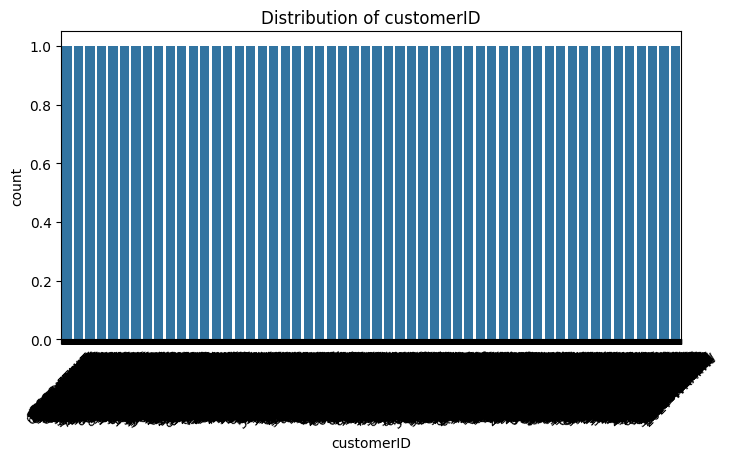

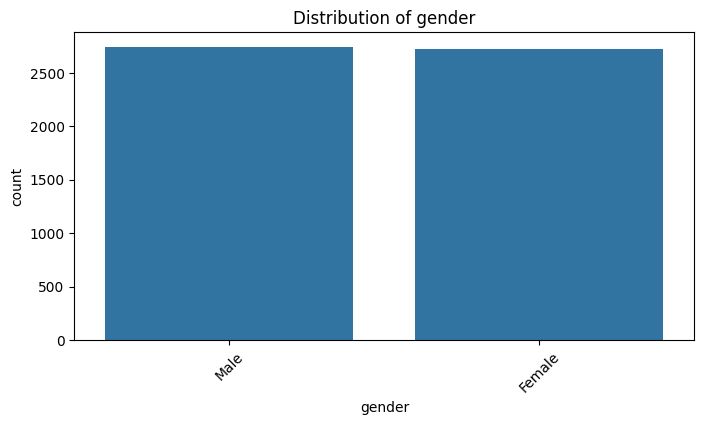

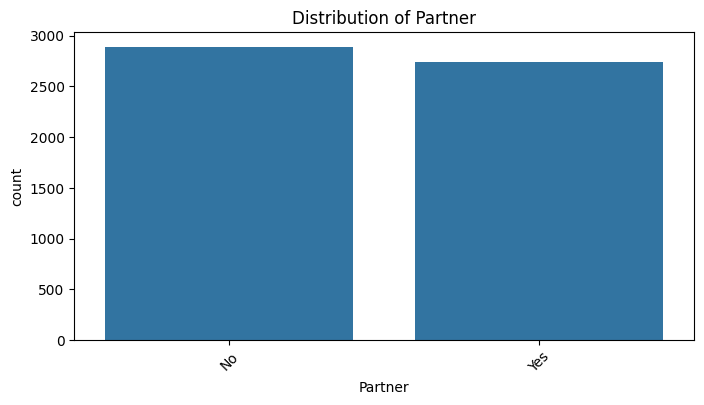

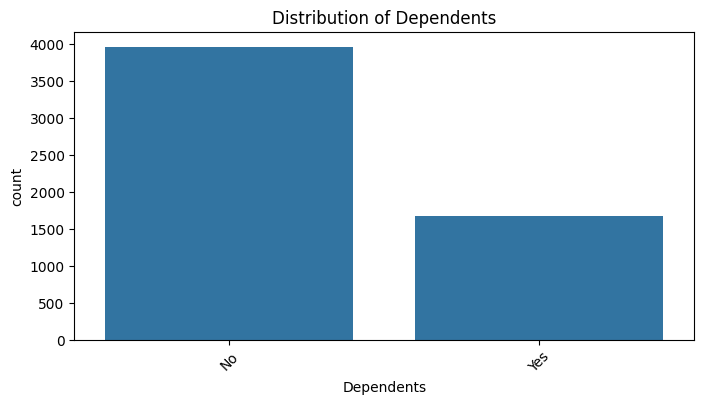

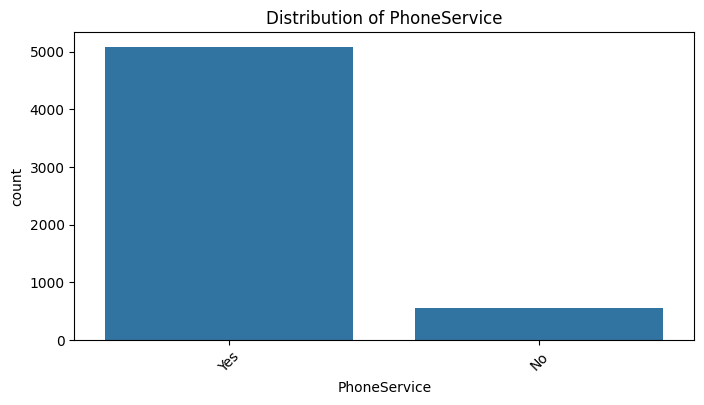

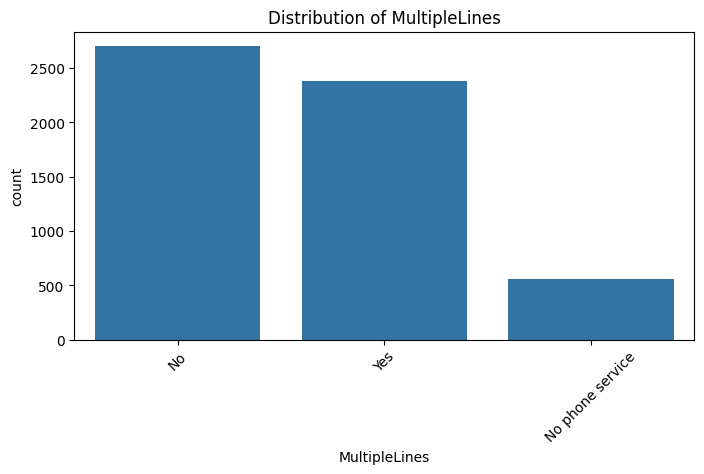

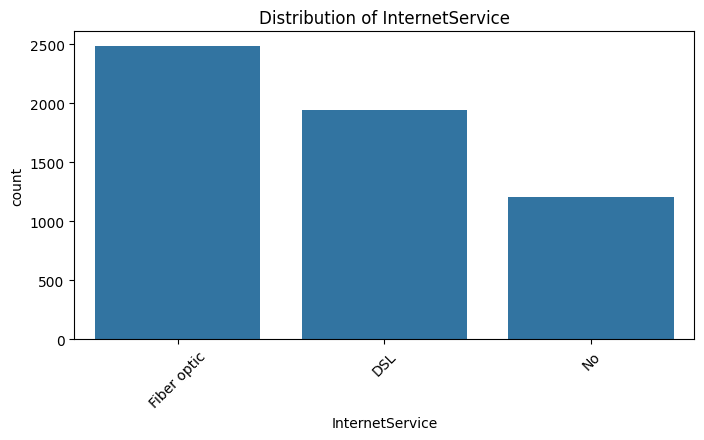

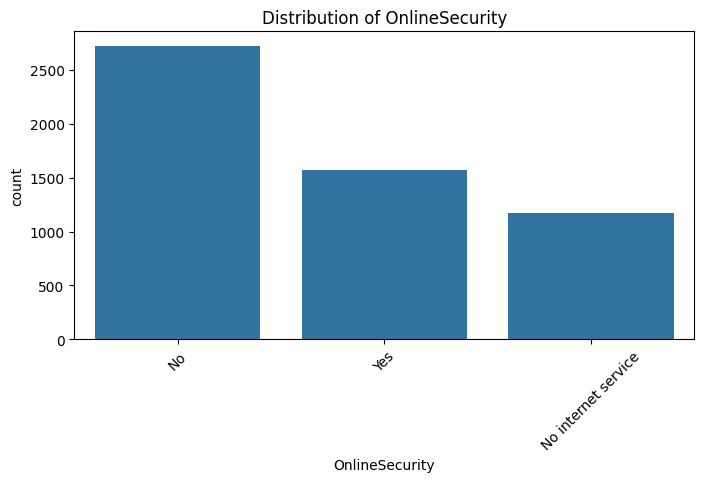

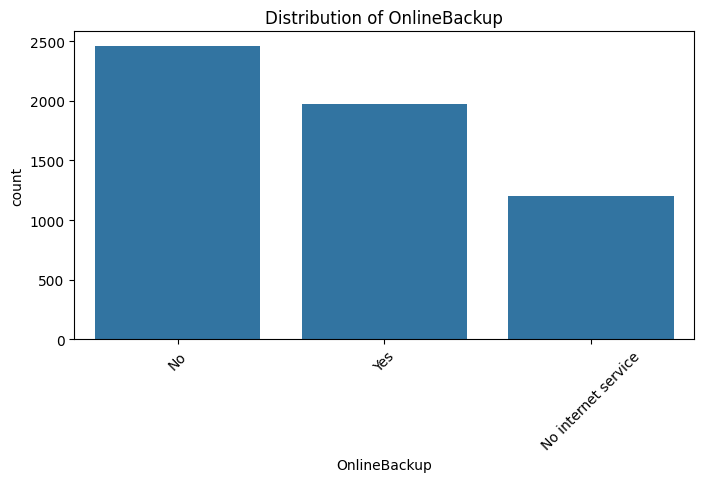

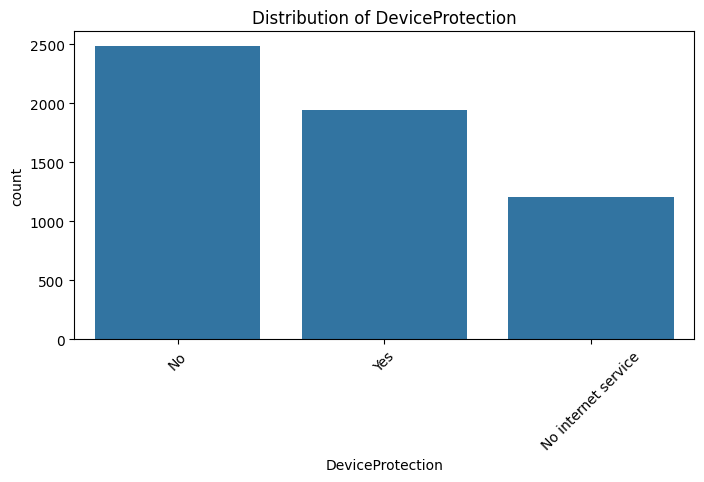

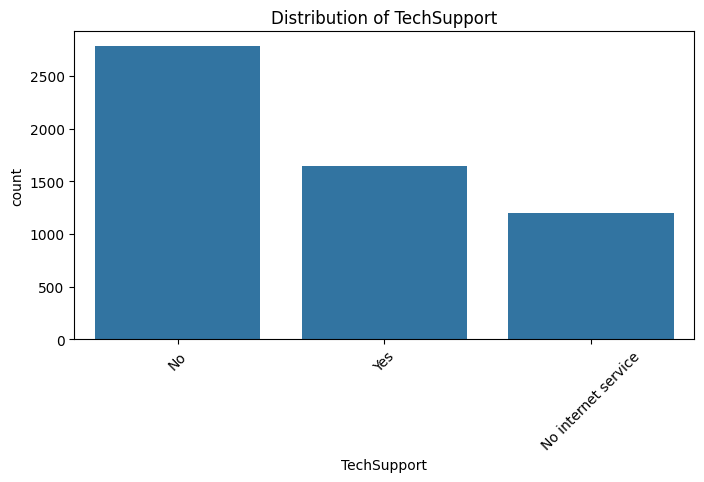

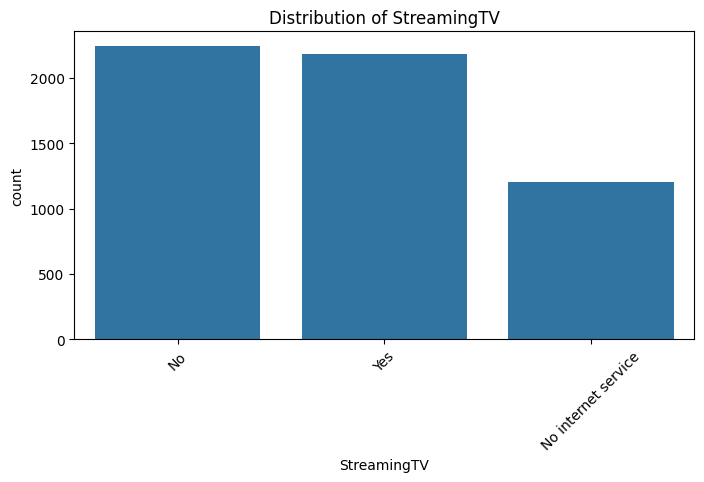

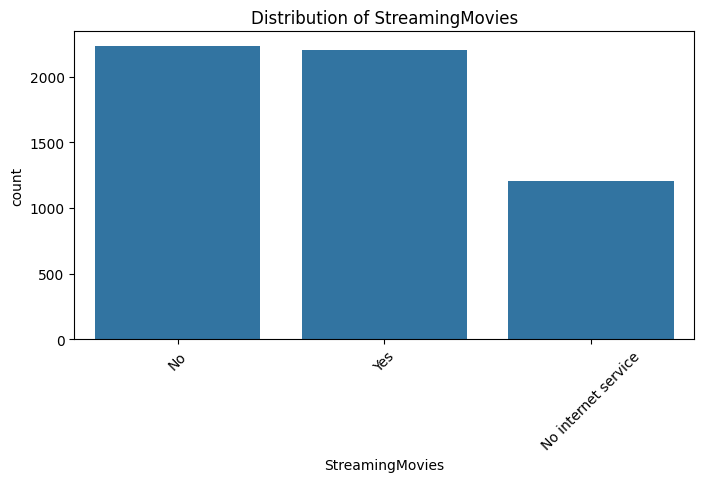

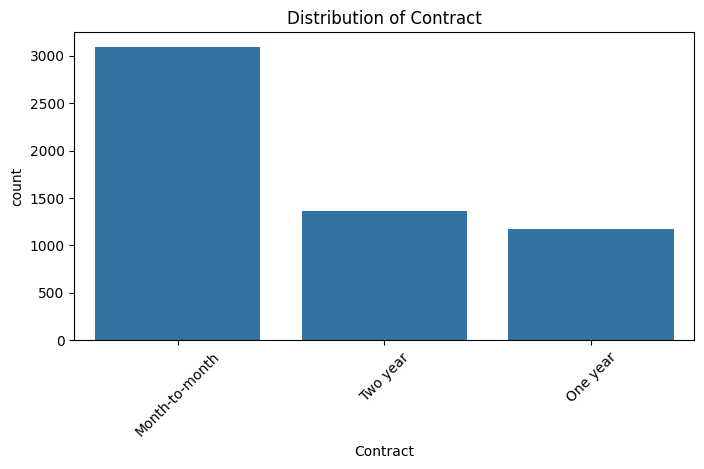

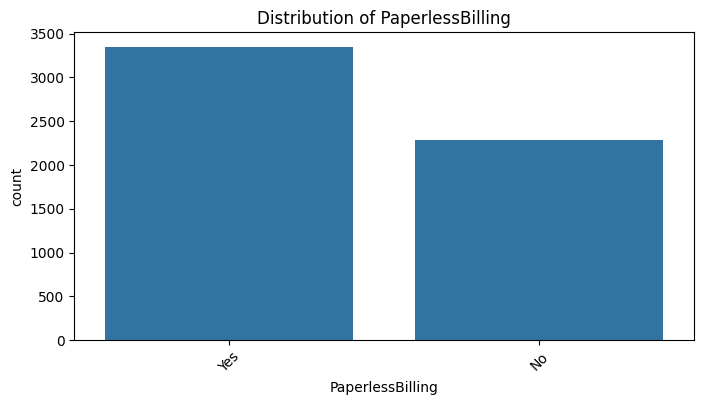

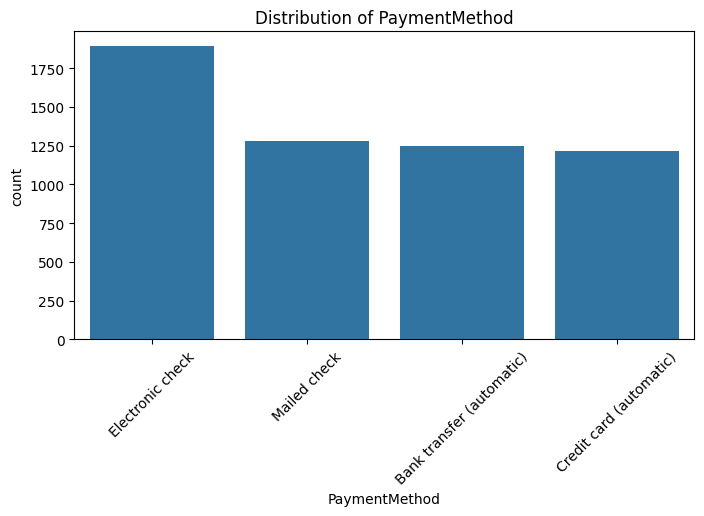

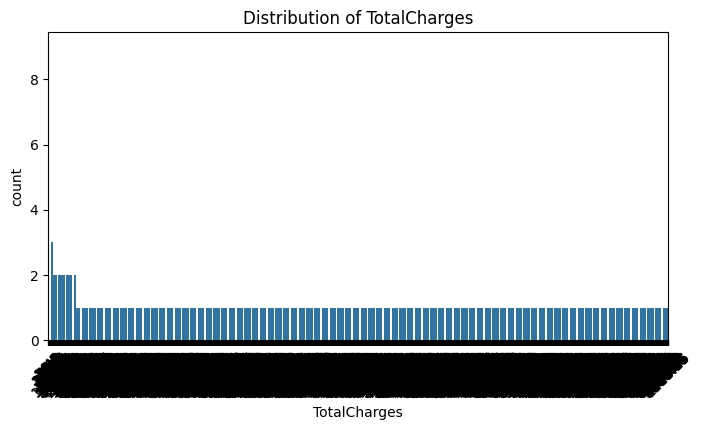

In [20]:
categorical_cols = features_df.select_dtypes(include="object").columns
for col in categorical_cols:
    plt.figure(figsize=(8, 4))
    sns.countplot(x=features_df[col], order=features_df[col].value_counts().index)
    plt.title(f"Distribution of {col}")
    plt.xticks(rotation=45)
    plt.show()

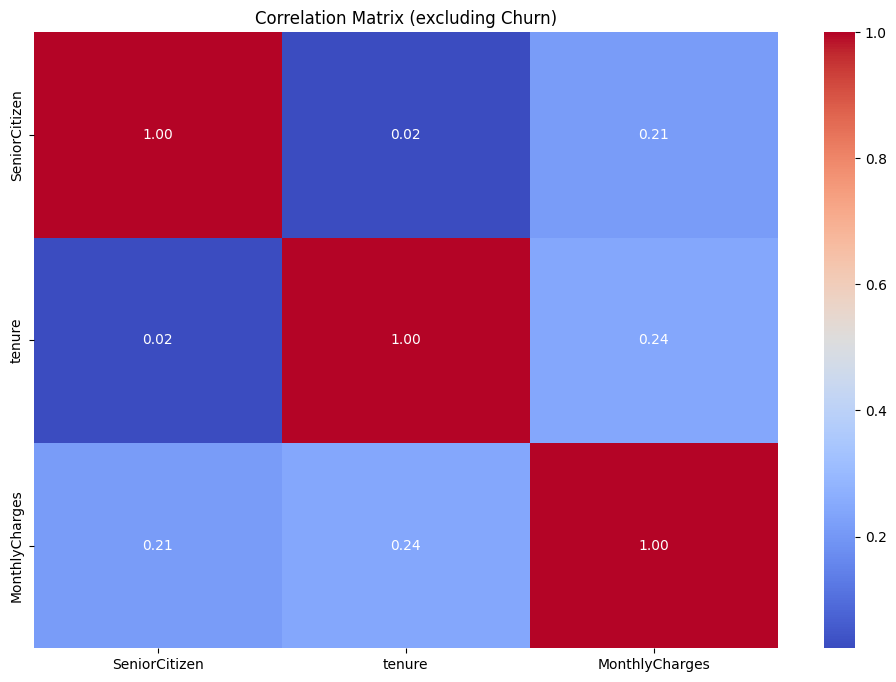

In [21]:
corr_matrix = features_df[numeric_cols].corr()

plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap="coolwarm", cbar=True)
plt.title("Correlation Matrix (excluding Churn)")
plt.show()

In [22]:
for df in [train, test]:
    df["TotalCharges"] = pd.to_numeric(df["TotalCharges"], errors="coerce")
    df["TotalCharges"] = df["TotalCharges"].fillna(df["TotalCharges"].median())

In [23]:
# 3. Data Preprocessing
# =========================
# - Handle missing values:
#     - Fill categorical columns with mode or 'Unknown'.
#     - Fill numerical columns with median or calculated values.
# - Encode categorical variables:
#     - Binary variables using LabelEncoder.
#     - Multi-class variables using OneHotEncoder or pd.get_dummies().
# - Scale/normalize numerical features using StandardScaler or MinMaxScaler.
# - Handle outliers if necessary (e.g., winsorization, clipping).

In [24]:
# Remove spaces from column names
train.columns = train.columns.str.strip()

# Fill missing categorical values (safe check)
if "gender" in train.columns:
    train["gender"] = train["gender"].fillna("Unknown")

if "OnlineSecurity" in train.columns:
    train["OnlineSecurity"] = train["OnlineSecurity"].fillna("No")

# Fill missing numeric values (safe check)
if "MonthlyCharges" in train.columns:
    train["MonthlyCharges"] = train["MonthlyCharges"].fillna(train["MonthlyCharges"].median())

if "TotalCharges" in train.columns and "tenure" in train.columns and "MonthlyCharges" in train.columns:
    train["TotalCharges"] = pd.to_numeric(train["TotalCharges"], errors="coerce")
    train["TotalCharges"] = train["TotalCharges"].fillna(train["tenure"] * train["MonthlyCharges"])

In [25]:
binary_cols = ["gender", "Partner", "Dependents", "PhoneService",
               "PaperlessBilling", "Churn"]

In [26]:
le = LabelEncoder()
for col in binary_cols:
    train[col] = le.fit_transform(train[col])
    if col in train.columns:
        test[col] = le.transform(test[col])

In [27]:
multi_cat_cols = ["MultipleLines", "InternetService", "OnlineSecurity",
                  "OnlineBackup", "DeviceProtection", "TechSupport",
                  "StreamingTV", "StreamingMovies", "Contract",
                  "PaymentMethod"]

In [28]:
train = pd.get_dummies(train, columns=multi_cat_cols, drop_first=True)
test = pd.get_dummies(test, columns=multi_cat_cols, drop_first=True)

In [29]:
train, test = train.align(test, join="left", axis=1, fill_value=0)

In [30]:
scaler = MinMaxScaler()
numeric_cols = ["tenure", "MonthlyCharges", "TotalCharges"]

In [31]:
train[numeric_cols] = scaler.fit_transform(train[numeric_cols])
test[numeric_cols] = scaler.transform(test[numeric_cols])

In [32]:
for col in numeric_cols:
    Q1 = train[col].quantile(0.25)
    Q3 = train[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    train[col] = train[col].clip(lower=lower_bound, upper=upper_bound)
    test[col]  = test[col].clip(lower=lower_bound, upper=upper_bound)

In [33]:
print("Processed Training Data Shape:", train.shape)
print("Processed Testing Data Shape:", test.shape)

Processed Training Data Shape: (5634, 32)
Processed Testing Data Shape: (1409, 32)


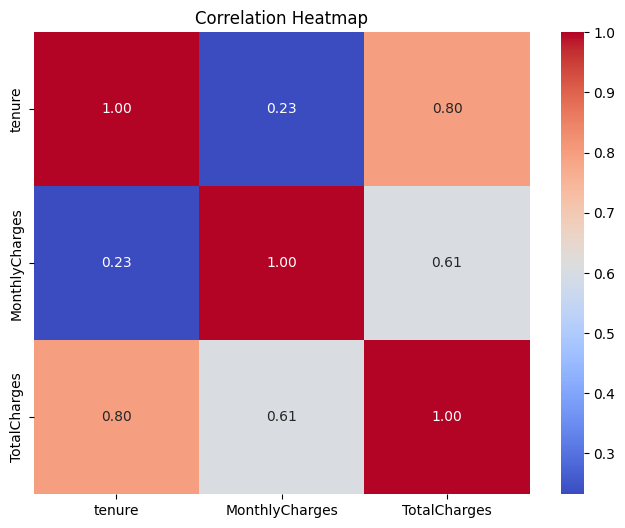

In [34]:
plt.figure(figsize=(8,6))
corr = train[numeric_cols].corr()
sns.heatmap(corr, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()

In [35]:
# 4. Feature Engineering
# =========================
# - Create interaction features (e.g., Tenure * Contract type).
# - Calculate customer lifetime value: Tenure * MonthlyCharges.
# - Perform feature selection:
#     - Use Random Forest feature importance or other selection methods.
# - Drop unnecessary columns (e.g., customerID).
# Interaction: Tenure × Contract type
train["Tenure_Contract_OneYear"] = train["tenure"] * train.get("Contract_One year", 0)
train["Tenure_Contract_TwoYear"] = train["tenure"] * train.get("Contract_Two year", 0)

In [36]:
train["Tenure_Payment_ElecCheck"] = train["tenure"] * train.get("PaymentMethod_Electronic check", 0)
train["Tenure_Payment_MailedCheck"] = train["tenure"] * train.get("PaymentMethod_Mailed check", 0)
train["Tenure_Payment_CreditCard"] = train["tenure"] * train.get("PaymentMethod_Credit card (automatic)", 0)

In [37]:
# CLV = tenure * MonthlyCharges
train["Customer_Lifetime_Value"] = train["tenure"] * train["MonthlyCharges"]

In [38]:
service_cols = ["PhoneService", "MultipleLines", "OnlineSecurity", "OnlineBackup",
                "DeviceProtection", "TechSupport", "StreamingTV", "StreamingMovies"]

# Keep only those that exist in train
valid_service_cols = [col for col in service_cols if col in train.columns]

print("Valid service columns found:", valid_service_cols)

Valid service columns found: ['PhoneService']


In [39]:
for col in valid_service_cols:
    train[col] = train[col].replace({"Yes": 1, "No": 0,
                                     "No internet service": 0,
                                     "No phone service": 0})

# Now create Total_Services
train["Total_Services"] = train[valid_service_cols].sum(axis=1)

print(train[["Total_Services"] + valid_service_cols].head())

   Total_Services  PhoneService
0               1             1
1               0             0
2               1             1
3               1             1
4               0             0


In [40]:
train["High_MonthlyCharges"] = (train["MonthlyCharges"] > train["MonthlyCharges"].median()).astype(int)

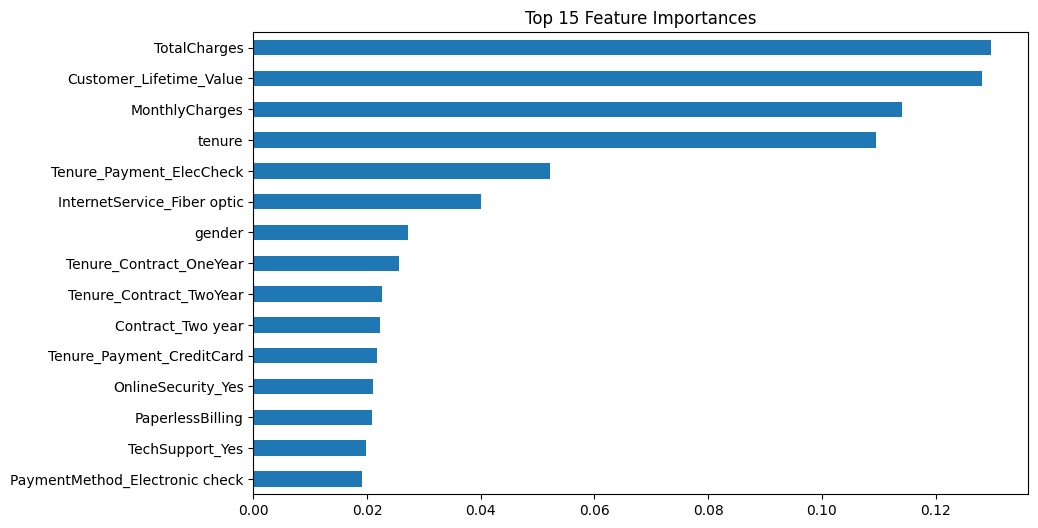

In [41]:
from sklearn.ensemble import RandomForestClassifier
import matplotlib.pyplot as plt

# Separate features and target
X = train.drop(columns=["Churn", "customerID"])  # remove target and ID
y = train["Churn"]

# Fit Random Forest
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X, y)

# Feature importance
importances = pd.Series(rf.feature_importances_, index=X.columns).sort_values(ascending=False)

# Plot top 15 features
plt.figure(figsize=(10,6))
importances[:15].plot(kind="barh")
plt.title("Top 15 Feature Importances")
plt.gca().invert_yaxis()
plt.show()

In [42]:
# =========================
# - Split dataset into train/validation sets using train_test_split().
# - Train models:
#     1. Random Forest
#     2. Decision Tree
#     3. SVM
#     4. KNN
#     5. Logistic Regression
#     6. Naive Bayes (optional)
# - Fit models on training data.
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix

X_train, X_val, y_train, y_val = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# Initialize and train KNN
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)

# Predictions
y_pred = knn.predict(X_val)
y_proba = knn.predict_proba(X_val)[:, 1]

--- KNN ---
Accuracy: 0.7666
Precision: 0.5638
Recall: 0.5581
F1 Score: 0.5609
ROC-AUC: 0.7004


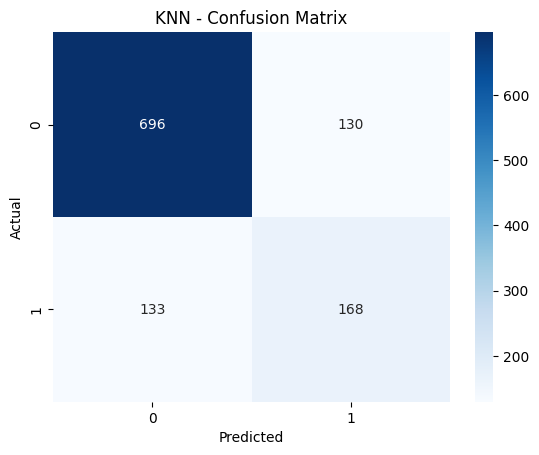

In [43]:
#6. Model Evaluation
# =========================
# - Predict on validation set.
# - Evaluate metrics:
#     - Accuracy
#     - ROC-AUC
#     - F1 Score
#     - Precision
#     - Recall
# Metrics
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix


print("--- KNN ---")
print(f"Accuracy: {accuracy_score(y_val, y_pred):.4f}")
print(f"Precision: {precision_score(y_val, y_pred, pos_label=1):.4f}")
print(f"Recall: {recall_score(y_val, y_pred, pos_label=1):.4f}")
print(f"F1 Score: {f1_score(y_val, y_pred, pos_label=1):.4f}")
print(f"ROC-AUC: {roc_auc_score(y_val, y_pred):.4f}")

# Confusion Matrix
cm = confusion_matrix(y_val, y_pred)
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.title("KNN - Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

--- Logistic Regression ---
Accuracy: 0.8048
Precision: 0.6528
Recall: 0.5748
F1-Score: 0.6113
ROC-AUC: 0.8487


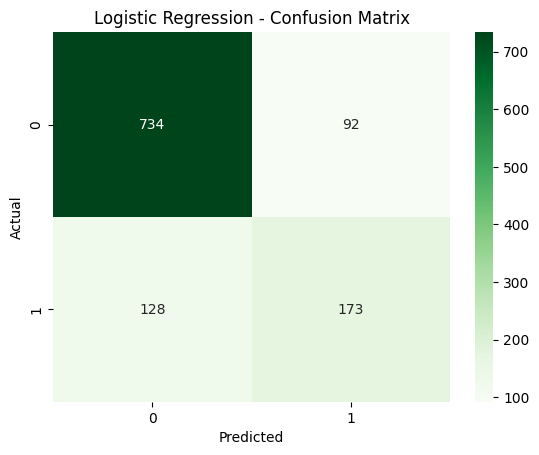

In [44]:
from sklearn.linear_model import LogisticRegression

# Initialize and train Logistic Regression
lr = LogisticRegression(max_iter=1000, random_state=42)
lr.fit(X_train, y_train)

# Predictions
y_pred = lr.predict(X_val)
y_proba = lr.predict_proba(X_val)[:, 1]

# Metrics
print("--- Logistic Regression ---")
print(f"Accuracy: {accuracy_score(y_val, y_pred):.4f}")
print(f"Precision: {precision_score(y_val, y_pred, pos_label=1):.4f}")
print(f"Recall: {recall_score(y_val, y_pred, pos_label=1):.4f}")
print(f"F1-Score: {f1_score(y_val, y_pred, pos_label=1):.4f}")
print(f"ROC-AUC: {roc_auc_score(y_val, y_proba):.4f}")

# Confusion Matrix
cm = confusion_matrix(y_val, y_pred)
sns.heatmap(cm, annot=True, fmt="d", cmap="Greens")
plt.title("Logistic Regression - Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

--- Naive Bayes ---
Accuracy: 0.6965
Precision: 0.4627
Recall: 0.8439
F1-Score: 0.5976
ROC-AUC: 0.8350


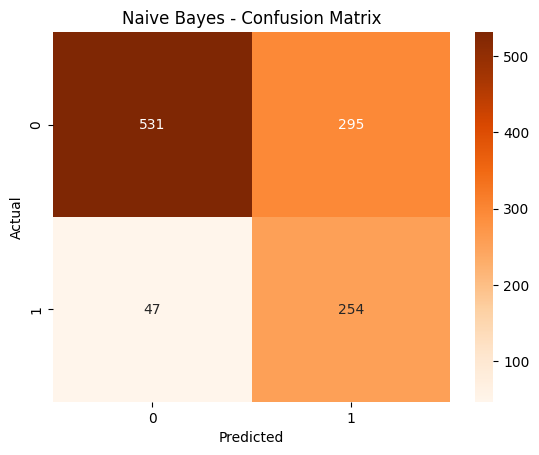

In [45]:
from sklearn.naive_bayes import GaussianNB


# Initialize and train Naive Bayes
nb = GaussianNB()
nb.fit(X_train, y_train)

# Predictions
y_pred = nb.predict(X_val)
y_proba = nb.predict_proba(X_val)[:, 1]

# Metrics
print("--- Naive Bayes ---")
print(f"Accuracy: {accuracy_score(y_val, y_pred):.4f}")
print(f"Precision: {precision_score(y_val, y_pred, pos_label=1):.4f}")
print(f"Recall: {recall_score(y_val, y_pred, pos_label=1):.4f}")
print(f"F1-Score: {f1_score(y_val, y_pred, pos_label=1):.4f}")
print(f"ROC-AUC: {roc_auc_score(y_val, y_proba):.4f}")

# Confusion Matrix
cm = confusion_matrix(y_val, y_pred)
sns.heatmap(cm, annot=True, fmt="d", cmap="Oranges")
plt.title("Naive Bayes - Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

--- Decision Tree ---
Accuracy: 0.7311
Precision: 0.4969
Recall: 0.5382
F1-Score: 0.5167
ROC-AUC: 0.6722


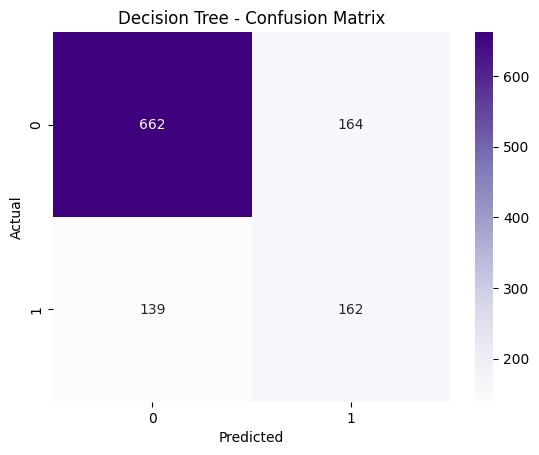

In [46]:
from sklearn.tree import DecisionTreeClassifier

# Initialize and train Decision Tree
dt = DecisionTreeClassifier(random_state=42)
dt.fit(X_train, y_train)

# Predictions
y_pred = dt.predict(X_val)
y_proba = dt.predict_proba(X_val)[:, 1]

# Metrics
print("--- Decision Tree ---")
print(f"Accuracy: {accuracy_score(y_val, y_pred):.4f}")
print(f"Precision: {precision_score(y_val, y_pred, pos_label=1):.4f}")
print(f"Recall: {recall_score(y_val, y_pred, pos_label=1):.4f}")
print(f"F1-Score: {f1_score(y_val, y_pred, pos_label=1):.4f}")
print(f"ROC-AUC: {roc_auc_score(y_val, y_proba):.4f}")

# Confusion Matrix
cm = confusion_matrix(y_val, y_pred)
sns.heatmap(cm, annot=True, fmt="d", cmap="Purples")
plt.title("Decision Tree - Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

--- Random Forest ---
Accuracy: 0.7959
Precision: 0.6437
Recall: 0.5282
F1-Score: 0.5803
ROC-AUC: 0.8354


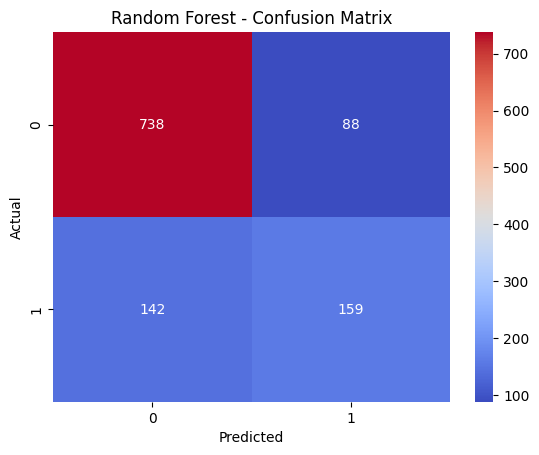

In [47]:
from sklearn.ensemble import RandomForestClassifier

# Initialize and train Random Forest
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

# Predictions
y_pred = rf.predict(X_val)
y_proba = rf.predict_proba(X_val)[:, 1]

# Metrics
print("--- Random Forest ---")
print(f"Accuracy: {accuracy_score(y_val, y_pred):.4f}")
print(f"Precision: {precision_score(y_val, y_pred, pos_label=1):.4f}")
print(f"Recall: {recall_score(y_val, y_pred, pos_label=1):.4f}")
print(f"F1-Score: {f1_score(y_val, y_pred, pos_label=1):.4f}")
print(f"ROC-AUC: {roc_auc_score(y_val, y_proba):.4f}")

# Confusion Matrix
cm = confusion_matrix(y_val, y_pred)
sns.heatmap(cm, annot=True, fmt="d", cmap="coolwarm")
plt.title("Random Forest - Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

--- SVM ---
Accuracy: 0.8048
Precision: 0.6640
Recall: 0.5449
F1-Score: 0.5985
ROC-AUC: 0.8170


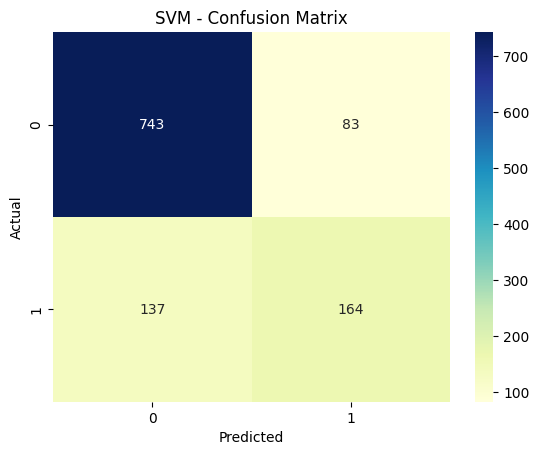

In [48]:
from sklearn.svm import SVC

# Initialize and train SVM
svm_model = SVC(kernel='rbf', probability=True, random_state=42)
svm_model.fit(X_train, y_train)

# Predictions
y_pred = svm_model.predict(X_val)
y_proba = svm_model.predict_proba(X_val)[:, 1]

# Metrics
print("--- SVM ---")
print(f"Accuracy: {accuracy_score(y_val, y_pred):.4f}")
print(f"Precision: {precision_score(y_val, y_pred, pos_label=1):.4f}")
print(f"Recall: {recall_score(y_val, y_pred, pos_label=1):.4f}")
print(f"F1-Score: {f1_score(y_val, y_pred, pos_label=1):.4f}")
print(f"ROC-AUC: {roc_auc_score(y_val, y_proba):.4f}")

# Confusion Matrix
cm = confusion_matrix(y_val, y_pred)
sns.heatmap(cm, annot=True, fmt="d", cmap="YlGnBu")
plt.title("SVM - Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

In [49]:
# 7. Hyperparameter Tuning
# =========================
# - Use RandomizedSearchCV or GridSearchCV for each model.
# - Define hyperparameter grids:
#     - Random Forest: n_estimators, max_depth, min_samples_split, etc.
#     - Decision Tree: max_depth, min_samples_split, etc.
#     - SVM: C, gamma, kernel
#     - KNN: n_neighbors, weights, metric
#     - Logistic Regression: C, penalty, solver
# - Fit RandomizedSearchCV on training data.
# - Get best parameters and refit model.
# - Evaluate tuned model on validation set.
from sklearn.model_selection import RandomizedSearchCV

rf_params = {
    "n_estimators": [100, 200, 300],
    "max_depth": [None, 10, 20],
    "min_samples_split": [2, 5, 10],
    "min_samples_leaf": [1, 2, 4],
    "max_features": ["sqrt", "log2"]
}
rand_rf = RandomizedSearchCV(
    rf,
    rf_params,
    n_iter=20,          # only 20 random combinations
    cv=3,
    scoring='roc_auc',
    n_jobs=-1,
    verbose=1,
    random_state=42
)
rand_rf.fit(X_train, y_train)
# Best model
best_rf = rand_rf.best_estimator_
print("Best Random Forest params:", rand_rf.best_params_)

# Predict on validation set
y_proba_rf = best_rf.predict_proba(X_val)[:, 1]  # probabilities for ROC-AUC
y_pred_rf = best_rf.predict(X_val)               # class predictions

# Evaluate metrics
from sklearn.metrics import roc_auc_score, f1_score, precision_score, recall_score

roc_auc = roc_auc_score(y_val, y_proba_rf)
f1 = f1_score(y_val, y_pred_rf, pos_label=1)
precision = precision_score(y_val, y_pred_rf, pos_label=1)
recall = recall_score(y_val, y_pred_rf, pos_label=1)

print("ROC-AUC:", round(roc_auc, 4))
print("F1 Score:", round(f1, 4))
print("Precision:", round(precision, 4))
print("Recall:", round(recall, 4))

Fitting 3 folds for each of 20 candidates, totalling 60 fits
Best Random Forest params: {'n_estimators': 300, 'min_samples_split': 2, 'min_samples_leaf': 4, 'max_features': 'log2', 'max_depth': 10}
ROC-AUC: 0.8507
F1 Score: 0.6171
Precision: 0.68
Recall: 0.5648


In [50]:
from sklearn.model_selection import RandomizedSearchCV
dt_params = {
    "max_depth": [None, 10, 20],
    "min_samples_split": [2, 5, 10],
    "min_samples_leaf": [1, 2, 4],
    "max_features": ["sqrt", "log2", None]
}
rand_dt = RandomizedSearchCV(
    dt,
    dt_params,
    n_iter=10,          # 10 random combinations
    cv=3,
    scoring='roc_auc',
    n_jobs=-1,
    verbose=1,
    random_state=42
)

# Fit on training data
rand_dt.fit(X_train, y_train)

# Best model
best_dt = rand_dt.best_estimator_
print("Best Decision Tree params:", rand_dt.best_params_)

# Predictions
y_proba_dt = best_dt.predict_proba(X_val)[:, 1]  # probabilities
y_pred_dt = best_dt.predict(X_val)               # class predictions

# Evaluate metrics
roc_auc = roc_auc_score(y_val, y_proba_dt)
f1 = f1_score(y_val, y_pred_dt, pos_label=1)
precision = precision_score(y_val, y_pred_dt, pos_label=1)
recall = recall_score(y_val, y_pred_dt, pos_label=1)


print("Decision Tree ROC-AUC:", round(roc_auc, 4))
print("F1 Score:", round(f1, 4))
print("Precision:", round(precision, 4))
print("Recall:", round(recall, 4))

Fitting 3 folds for each of 10 candidates, totalling 30 fits
Best Decision Tree params: {'min_samples_split': 5, 'min_samples_leaf': 2, 'max_features': 'sqrt', 'max_depth': 10}
Decision Tree ROC-AUC: 0.793
F1 Score: 0.5287
Precision: 0.5958
Recall: 0.4751


In [51]:
from sklearn.model_selection import RandomizedSearchCV
svm_params = {
    "C": [0.1, 1, 10],
    "gamma": ['scale', 0.01, 0.001],
    "kernel": ['rbf', 'linear']
}
rand_svm = RandomizedSearchCV(
    svm_model,
    svm_params,
    n_iter=10,      # 10 random combinations
    cv=3,
    scoring='roc_auc',
    n_jobs=-1,
    verbose=1,
    random_state=42
)

# Fit on training data
rand_svm.fit(X_train, y_train)

# Best model
best_svm = rand_svm.best_estimator_
print("Best SVM params:", rand_svm.best_params_)

# Predict using decision function
y_score_svm = best_svm.decision_function(X_val)  # continuous scores
y_pred_svm = best_svm.predict(X_val)             # class predictions

# Evaluate metrics
roc_auc = roc_auc_score(y_val, y_score_svm)
f1 = f1_score(y_val, y_pred_svm, pos_label=1)
precision = precision_score(y_val, y_pred_svm, pos_label=1)
recall = recall_score(y_val, y_pred_svm, pos_label=1)

print("SVM ROC-AUC:", round(roc_auc, 4))
print("F1 Score:", round(f1, 4))
print("Precision:", round(precision, 4))
print("Recall:", round(recall, 4))

Fitting 3 folds for each of 10 candidates, totalling 30 fits
Best SVM params: {'kernel': 'linear', 'gamma': 0.001, 'C': 1}
SVM ROC-AUC: 0.8343
F1 Score: 0.5859
Precision: 0.6429
Recall: 0.5382


In [52]:
knn_params = {
    "n_neighbors": [3, 5, 7],
    "weights": ['uniform', 'distance'],
    "metric": ['euclidean', 'manhattan']
}

# RandomizedSearchCV
rand_knn = RandomizedSearchCV(
    knn,
    knn_params,
    n_iter=10,     # 10 random combinations
    cv=3,
    scoring='roc_auc',
    n_jobs=-1,
    verbose=1,
    random_state=42
)

# Fit on training data
rand_knn.fit(X_train, y_train)

# Best model
best_knn = rand_knn.best_estimator_
print("Best KNN params:", rand_knn.best_params_)

# Predict
y_proba_knn = best_knn.predict_proba(X_val)[:, 1]  # probabilities
y_pred_knn = best_knn.predict(X_val)              # class predictions

# Evaluate metrics
roc_auc = roc_auc_score(y_val, y_proba_knn)
f1 = f1_score(y_val, y_pred_knn, pos_label=1)
precision = precision_score(y_val, y_pred_knn, pos_label=1)
recall = recall_score(y_val, y_pred_knn, pos_label=1)


Fitting 3 folds for each of 10 candidates, totalling 30 fits
Best KNN params: {'weights': 'uniform', 'n_neighbors': 7, 'metric': 'manhattan'}


In [53]:
lr_params = {
    "C": [0.01, 0.1, 1, 10],
    "penalty": ['l2'],           # keep simple for speed
    "solver": ['liblinear', 'saga']
}


# RandomizedSearchCV
rand_lr = RandomizedSearchCV(
    lr,
    lr_params,
    n_iter=8,          # 8 random combinations
    cv=3,
    scoring='roc_auc',
    n_jobs=-1,
    verbose=1,
    random_state=42
)

# Fit on training data
rand_lr.fit(X_train, y_train)

# Best model
best_lr = rand_lr.best_estimator_
print("Best Logistic Regression params:", rand_lr.best_params_)

# Predict probabilities
y_proba_lr = best_lr.predict_proba(X_val)[:, 1]  # probabilities
y_pred_lr = best_lr.predict(X_val)               # class predictions

# Evaluate metrics
roc_auc = roc_auc_score(y_val, y_proba_lr)
f1 = f1_score(y_val, y_pred_lr, pos_label=1)
precision = precision_score(y_val, y_pred_lr, pos_label=1)
recall = recall_score(y_val, y_pred_lr, pos_label=1)

print("Logistic Regression ROC-AUC:", round(roc_auc, 4))
print("F1 Score:", round(f1, 4))
print("Precision:", round(precision, 4))
print("Recall:", round(recall, 4))

Fitting 3 folds for each of 8 candidates, totalling 24 fits
Best Logistic Regression params: {'solver': 'liblinear', 'penalty': 'l2', 'C': 1}
Logistic Regression ROC-AUC: 0.8485
F1 Score: 0.6124
Precision: 0.6553
Recall: 0.5748


In [54]:
# 1. Define models
models = {
    "Logistic Regression": LogisticRegression(max_iter=1000, random_state=42),
    "Naive Bayes": GaussianNB(),
    "KNN": KNeighborsClassifier(),
    "SVM": SVC(probability=True, random_state=42),  # probability=True needed for predict_proba
    "Random Forest": RandomForestClassifier(random_state=42)
}

results = []

# 2. Train and evaluate
for name, model in models.items():
    model.fit(X_train, y_train)

    if name == "SVM":
        # for ROC-AUC, we can use decision_function or predict_proba
        roc_auc = roc_auc_score(y_val, model.decision_function(X_val))
    else:
        roc_auc = roc_auc_score(y_val, model.predict_proba(X_val)[:, 1])

    y_pred = model.predict(X_val)

    results.append({
        "Model": name,
        "Accuracy": accuracy_score(y_val, y_pred),
        "Precision": precision_score(y_val, y_pred, pos_label=1),
        "Recall": recall_score(y_val, y_pred, pos_label=1),
        "F1": f1_score(y_val, y_pred, pos_label=1),
        "ROC-AUC": roc_auc
    })

# 3. Create results DataFrame
results_df = pd.DataFrame(results).sort_values(by="ROC-AUC", ascending=False)
display(results_df)

,Model,Accuracy,Precision,Recall,F1,ROC-AUC
0,Logistic Regression,0.804791,0.652830,0.574751,0.611307,0.848709
4,Random Forest,0.795918,0.643725,0.528239,0.580292,0.835397
1,Naive Bayes,0.696539,0.462659,0.843854,0.597647,0.834969
3,SVM,0.804791,0.663968,0.544850,0.598540,0.816962
2,KNN,0.766637,0.563758,0.558140,0.560935,0.778165
